<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [1]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000000120317561, 1.2499999939841218, 0.5000000120317564]
  * f(x_sol) = 2.2499999999999747
  * nb_iters = 9
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.5000002259296457, 1.249999887035177, 0.5000002259296459]
  * f(x_sol) = 2.2499999999913736
  * nb_iters = 8
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072338859288741, 0.8227553207255176]
  * f(x_sol) = 0.008615650657331995
  * nb_iters = 5
  * flag     = 0
  * solution = [0.9072339605110892, 0.8227554

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

#### Question 1

En appliquant l'algorithme de Lagrengien Augmenté avec l'algorithme de Newton ou Pas de Cauchy ou Gradient Conjugué Tronqué sur la fonction f1, nous trouvons la solution après 7 itération, et pour f1, nous trouvons la solution après 5 itérations. En général, les solutions optimales obtenues par différents algorithmes sont cohérentes entre elles pour chaque fonction, et le nombre d'itérations est assez faible, ce qui indique la convergence rapide.

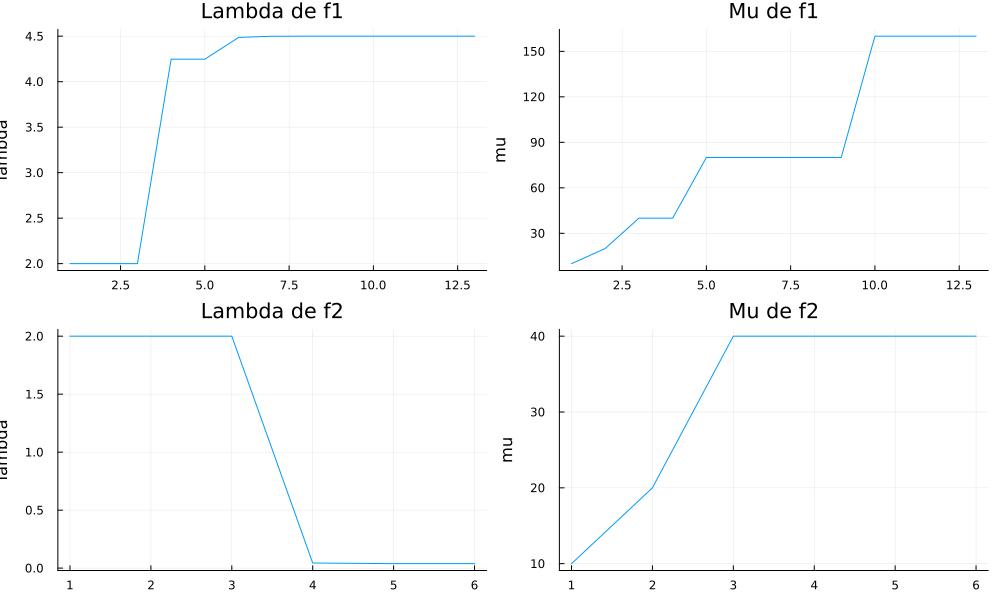

In [18]:
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

_,_,_,_,u_f2,lambda_f2 = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, pts1.x022)

courbe_lambda_f2 = plot(lambda_f2, xlabel = "", ylabel = "lambda", title = "Lambda de f2", legend = false)

courbe_mu_f2 = plot(u_f2, xlabel = "", ylabel = "mu", title = "Mu de f2", legend = false)

_,_,_,_,u_f1,lambda_f1 = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, pts2.x01, algo_noc="newton")

courbe_lambda_f1 = plot(lambda_f1, xlabel = "", ylabel = "lambda", title = "Lambda de f1", legend = false)

courbe_mu_f1 = plot(u_f1, xlabel = "", ylabel = "mu", title = "Mu de f1", legend = false)

plot(courbe_lambda_f1, courbe_mu_f1, courbe_lambda_f2, courbe_mu_f2, layout=(2,2), size = (1000, 600))

##### Pour $\lambda$

Pour la fonction $f_1$, nous remarquons que $\lambda$ est croissante. Cela s'explique par le fait qu'il faut imposer une pénalité plus forte afin d'assurer un respect strict des contraintes.

En revanche, pour la fonction $f_2$, $\lambda$ est décroissante. Ce comportement suggère que, une fois la solution suffisamment proche, les ajustements supplémentaires de la pénalité deviennent superflus.

##### Pour $\mu$

L'augmentation de $\mu$ pour les fonctions $f_1$ et $f_2$ montre une intensification de la pénalité liée aux contraintes, ce qui favorise la convergence vers des solutions admissibles.

#### Question 2

L'influence du paramètre $\tau$ dans la performance de l'algorithme :

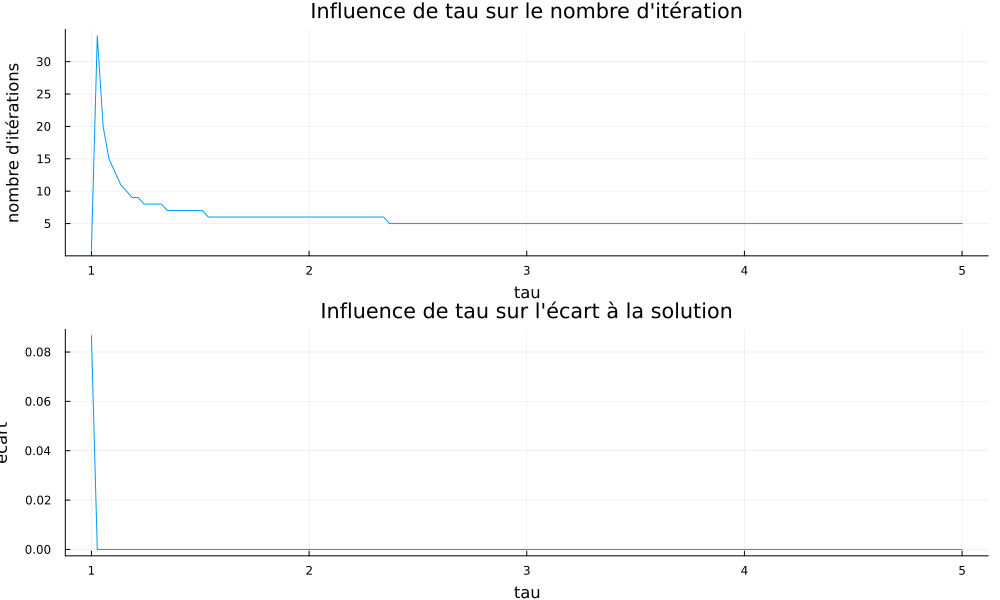

In [17]:
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

nb_test = 150
tab_tau = range(1,5,length=nb_test)
nb_iters = zeros(nb_test)
ecart = zeros(nb_test)
for i in 1:nb_test
    x_sol,f_sol,_,nb_iters[i],_,_ = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, pts2.x04, τ = tab_tau[i])
    ecart[i] = norm(x_sol - sol_fct2_augm)
end

p1 = plot(tab_tau, nb_iters, xlabel = "tau", ylabel = "nombre d'itérations", title = "Influence de tau sur le nombre d'itération", legend = false)
p2 = plot(tab_tau, ecart, xlabel = "tau", ylabel = "ecart", title = "Influence de tau sur l'écart à la solution", legend = false)

plot(p1, p2, layout=(2,1), size = (1000, 600))

Nous remarquons que le nombre d'itérations diminue à mesure que $\tau$ augmente. La stabilisation observée à la fin du processus suggère qu'à $\tau = 2.5$, une stabilité optimale est atteinte. Cela permet de conclure que, dans le cadre de l'algorithme du Lagrangien Augmenté, un paramètre $\tau$ plus élevé impose une pénalité plus forte pour les violations de contraintes, ce qui conduit à une convergence plus rapide et plus efficace.